In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
#reading csv file
df = pd.read_csv('chicago_taxi.csv')
df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,fec6b8b1c5cd7af9e6dc4e9c8c46fb08987f2e9c,56a1119c6ca57e39525cf06829f9ecff553cf4b5ac2482...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,322.0,0.80,NaN,NaN,8.0,28.0,...,0.0,5.75,Cash,Medallion Leasin,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
1,ff5cad1f181d44fe60b9d0a1330f78269511d54a,6acd828b5cde8b4529317e8eda5b4fb9663fa81d1143c9...,01/24/2020 12:15:00 AM,01/24/2020 12:30:00 AM,671.0,5.17,NaN,NaN,8.0,3.0,...,0.0,16.75,Credit Card,Chicago Carriage Cab Corp,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
2,fbe685844176dd7822b6e256efce7fa3f8909e4b,b968bad5a2daed924a10e8ec4fb35513e060a076c575f7...,01/24/2020 12:15:00 AM,01/24/2020 12:30:00 AM,960.0,0.40,NaN,NaN,8.0,3.0,...,0.0,22.60,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
3,fddd99b2c6db17848390d4b57e7fff970e22b413,a4e718943931c99476ac0b332bb99261dd8e15994076bf...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,120.0,0.00,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,4.00,Cash,Blue Ribbon Taxi Association Inc.,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
4,f9f914b68a3ddb07fba1acf5bfcb5e1c7bb5f3bc,cbdd490649df25aa771979bed8930b199d27a990ccdb42...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,360.0,1.40,NaN,NaN,28.0,8.0,...,1.0,7.75,No Charge,Star North Management LLC,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)


In [3]:
#Dropping Null values
df.dropna(axis=0,how='any',subset=['Pickup Centroid Latitude','Pickup Centroid Longitude'],inplace=True)
len(df)

273071

In [4]:
# Variable with the Longitude and Latitude
X=df.loc[:,['Trip ID','Pickup Centroid Latitude','Pickup Centroid Longitude']]
X.head(10)

,Trip ID,Pickup Centroid Latitude,Pickup Centroid Longitude
0,fec6b8b1c5cd7af9e6dc4e9c8c46fb08987f2e9c,41.899602,-87.633308
1,ff5cad1f181d44fe60b9d0a1330f78269511d54a,41.899602,-87.633308
2,fbe685844176dd7822b6e256efce7fa3f8909e4b,41.899602,-87.633308
3,fddd99b2c6db17848390d4b57e7fff970e22b413,41.892508,-87.626215
4,f9f914b68a3ddb07fba1acf5bfcb5e1c7bb5f3bc,41.874005,-87.663518
5,f9abb39e2408d544d180bf4f6b062bc693a8acb9,41.899602,-87.633308
6,f6d9aef9077b4d193d066495967ce15de25a6c79,41.874005,-87.663518
7,f7552f713853355f3c27a6d47c9187c7b1f5f048,41.890922,-87.618868
8,f78abbf1c72cf0b29f7c2ed1cc592a6e7c4a1b23,41.899602,-87.633308
9,f89693587c1cec74f99a5d2245a0b53cf56d72cb,41.922686,-87.649489


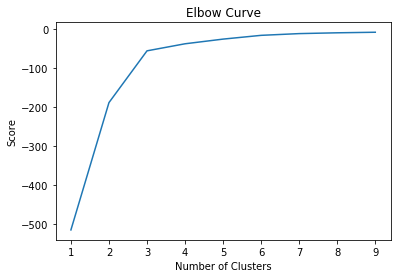

In [5]:
#Plotting elbow curve
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Pickup Centroid Latitude']]
X_axis = df[['Pickup Centroid Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

From the elbow graph we can see that 3 is the best cluster size 

In [6]:
# Computing k means clustering
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,Trip ID,Pickup Centroid Latitude,Pickup Centroid Longitude,cluster_label
0,fec6b8b1c5cd7af9e6dc4e9c8c46fb08987f2e9c,41.899602,-87.633308,0
1,ff5cad1f181d44fe60b9d0a1330f78269511d54a,41.899602,-87.633308,0
2,fbe685844176dd7822b6e256efce7fa3f8909e4b,41.899602,-87.633308,0
3,fddd99b2c6db17848390d4b57e7fff970e22b413,41.892508,-87.626215,0
4,f9f914b68a3ddb07fba1acf5bfcb5e1c7bb5f3bc,41.874005,-87.663518,0
5,f9abb39e2408d544d180bf4f6b062bc693a8acb9,41.899602,-87.633308,0
6,f6d9aef9077b4d193d066495967ce15de25a6c79,41.874005,-87.663518,0
7,f7552f713853355f3c27a6d47c9187c7b1f5f048,41.890922,-87.618868,0
8,f78abbf1c72cf0b29f7c2ed1cc592a6e7c4a1b23,41.899602,-87.633308,0
9,f89693587c1cec74f99a5d2245a0b53cf56d72cb,41.922686,-87.649489,0


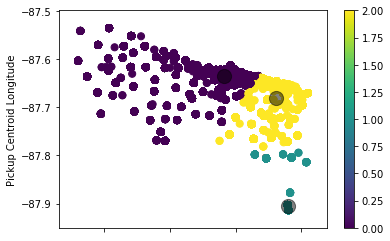

In [7]:
#plotting cluster
X.plot.scatter(x = 'Pickup Centroid Latitude', y = 'Pickup Centroid Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [8]:
#Saving cluster info
X = X[['Trip ID','cluster_label']]
X.head(5)

,Trip ID,cluster_label
0,fec6b8b1c5cd7af9e6dc4e9c8c46fb08987f2e9c,0
1,ff5cad1f181d44fe60b9d0a1330f78269511d54a,0
2,fbe685844176dd7822b6e256efce7fa3f8909e4b,0
3,fddd99b2c6db17848390d4b57e7fff970e22b413,0
4,f9f914b68a3ddb07fba1acf5bfcb5e1c7bb5f3bc,0


In [9]:
#joining cluster with orignal data
clustered_data = df.merge(X, left_on='Trip ID', right_on='Trip ID')
clustered_data.head(5)

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,cluster_label
0,fec6b8b1c5cd7af9e6dc4e9c8c46fb08987f2e9c,56a1119c6ca57e39525cf06829f9ecff553cf4b5ac2482...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,322.0,0.80,NaN,NaN,8.0,28.0,...,5.75,Cash,Medallion Leasin,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.874005,-87.663518,POINT (-87.6635175498 41.874005383),0
1,ff5cad1f181d44fe60b9d0a1330f78269511d54a,6acd828b5cde8b4529317e8eda5b4fb9663fa81d1143c9...,01/24/2020 12:15:00 AM,01/24/2020 12:30:00 AM,671.0,5.17,NaN,NaN,8.0,3.0,...,16.75,Credit Card,Chicago Carriage Cab Corp,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197),0
2,fbe685844176dd7822b6e256efce7fa3f8909e4b,b968bad5a2daed924a10e8ec4fb35513e060a076c575f7...,01/24/2020 12:15:00 AM,01/24/2020 12:30:00 AM,960.0,0.40,NaN,NaN,8.0,3.0,...,22.60,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197),0
3,fddd99b2c6db17848390d4b57e7fff970e22b413,a4e718943931c99476ac0b332bb99261dd8e15994076bf...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,120.0,0.00,1.703108e+10,1.703108e+10,8.0,8.0,...,4.00,Cash,Blue Ribbon Taxi Association Inc.,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),0
4,f9f914b68a3ddb07fba1acf5bfcb5e1c7bb5f3bc,cbdd490649df25aa771979bed8930b199d27a990ccdb42...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,360.0,1.40,NaN,NaN,28.0,8.0,...,7.75,No Charge,Star North Management LLC,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.899602,-87.633308,POINT (-87.6333080367 41.899602111),0


In [10]:
#Counting the no of datapoints in each cluster
clustered_data.cluster_label.value_counts()

0    223589
1     26524
2     22958
Name: cluster_label, dtype: int64

I used k-means clustering for this data because k-means clearly formed cluster which helped for pre-clustering, reducing the space into disjoint smaller sub-spaces by which we can easily see the un labelled data.
I established hyperparameters by using the cluster as 3 which I found by elbow method,init method is initialized with kmeans ++ which can help in speeding up convergence
Also,K-Means is suitable for a large number of datasets, so I chose this over other dataset.
Although I considered DBscan also as my 2nd choice ,but I preferred KMeans over DBscan as KMeans is much faster than DBScan and also DBScan needs a careful selection of its parameters 